Working through the [tutorial](https://einops.rocks/1-einops-basics/)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat
show = plt.imshow

(6, 96, 96, 3) float64


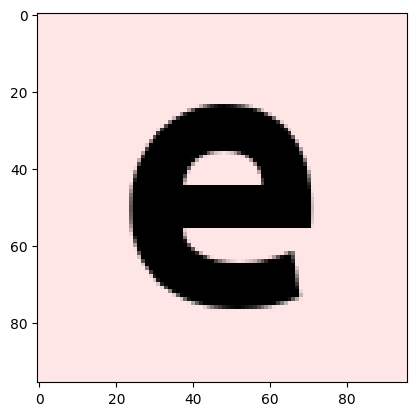

In [ ]:
# instead of 
#   y = x.transpose(0, 2, 3, 1)
# we can use
#   y = rearrange(x, 'b c h w -> b h w c')

ims = np.load("./resources/test_images.npy", allow_pickle=False)
print(ims.shape, ims.dtype)
show(ims[0])

# Rearrange

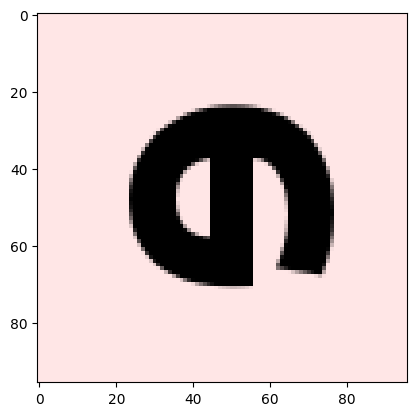

In [18]:
# transpose
show(rearrange(ims[0], "h w c -> w h c"))

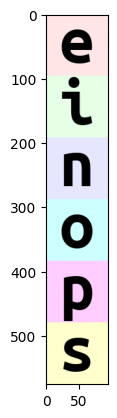

In [20]:
# put 6 images in column
show(rearrange(ims, "b h w c -> (b h) w c"))

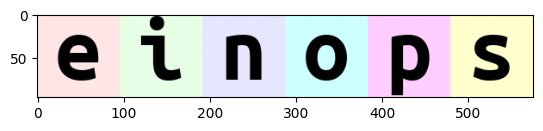

In [21]:
# put 6 images in a row
show(rearrange(ims, "b h w c -> h (b w) c"))

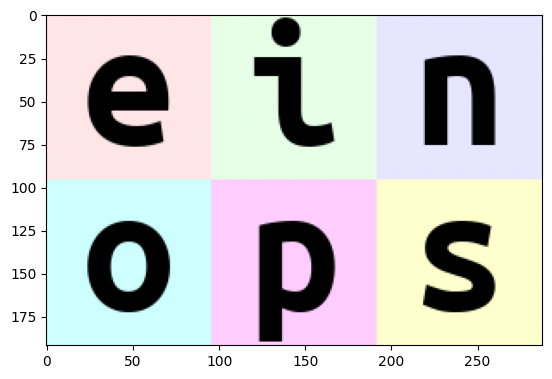

In [ ]:
# ein
# ops
show(rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c", b1=2))

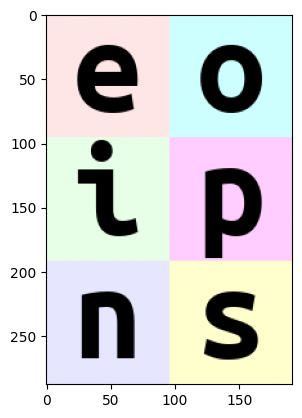

In [29]:
# eo
# ip
# ns
show(rearrange(ims, "(b1 b2) h w c -> (b2 h) (b1 w) c", b1=2))

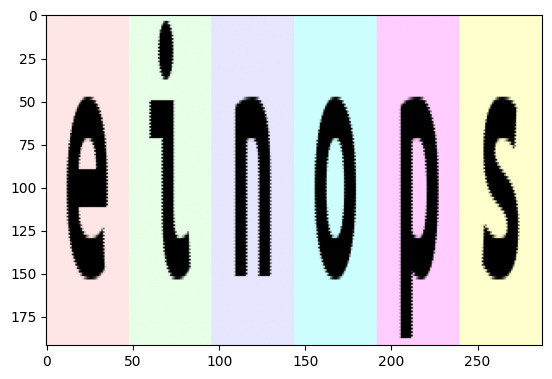

In [42]:
# move half of width to height
show(rearrange(ims, "b h (w1 w2) c -> (h w2) (b w1) c", w2=2))

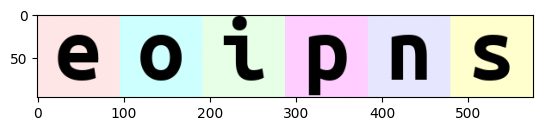

In [61]:
# eoipns
show(rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c", b1=2))

In [ ]:
# add a new dimension
np.shape(rearrange(ims, "b h w c -> 1 b h w c"))

# Reduce

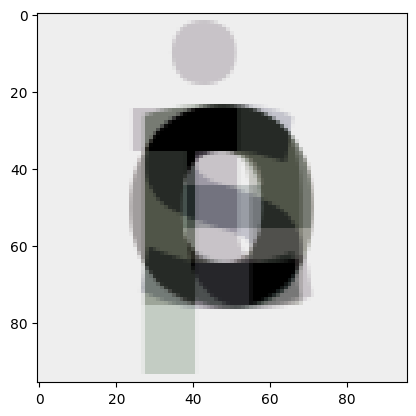

In [50]:
show(reduce(ims, "b h w c -> h w c", "mean"))

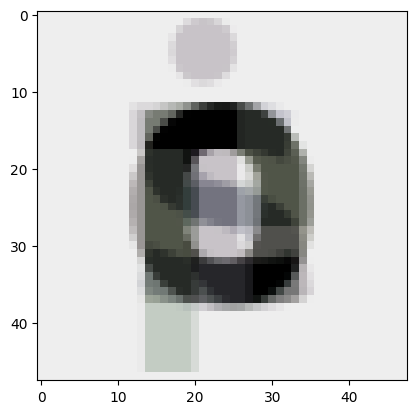

In [ ]:
show(reduce(ims, "b (h1 h2) (w1 w2) c -> h1 (b w1) c", "mean", h2=2, w2=2))

# Repeat

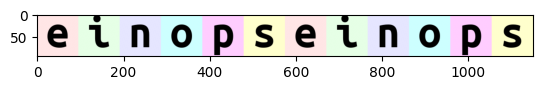

In [ ]:
# 'r' before b to repeat everything
show(repeat(ims, "b h w c -> h (r b w) c", r=2))

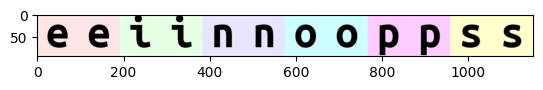

In [ ]:
# 'r' before w to repeat the letters
show(repeat(ims, "b h w c -> h (b r w) c", r=2))

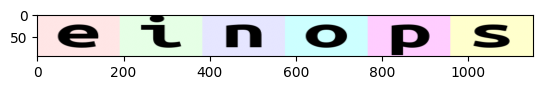

In [67]:
# 'r' at the end to repeat the pixels
show(repeat(ims, "b h w c -> h (b w r) c", r=2))